# Flight Fare Prediction - Data Exploration

**Objective**: Explore the Bangladesh Flight Price Dataset and understand its structure, quality, and patterns.

**Dataset**: Flight_Price_Dataset_of_Bangladesh.csv  
**Source**: Kaggle  
**Date**: 2026-02-06

**Note**: All implementation logic is in `scripts/` directory. This notebook contains only function calls.

## 1. Setup and Configuration

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import custom modules
from scripts import data_loader, data_quality, visualizations, analysis 

# Configure display and plotting
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Setup complete!")

Setup complete!


## 2. Load Data

In [2]:
# Load the flight price dataset
df = data_loader.load_flight_data()

Dataset loaded successfully!
Shape: 57,000 rows × 17 columns
Memory usage: 48.22 MB


## 3. Initial Data Inspection

In [3]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.22,Direct,Airbus A320,Economy,Online Website,21131.23,5169.68,26300.91,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.61,Direct,Airbus A320,First Class,Travel Agency,11605.40,200.00,11805.40,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.69,1 Stop,Boeing 787,Economy,Travel Agency,39882.50,11982.37,51864.87,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.69,Direct,Airbus A320,Economy,Direct Booking,4435.61,200.00,4635.61,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.06,1 Stop,Airbus A350,Business,Direct Booking,59243.81,14886.57,74130.38,Regular,90


In [4]:
# Display dataset information
data_loader.display_basic_info(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-

In [5]:
# Statistical summary
print("Statistical Summary (Numerical Columns):")
df.describe()

Statistical Summary (Numerical Columns):


,Duration (hrs),Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure
count,57000.00,57000.00,57000.00,57000.00,57000.00
mean,3.99,58899.56,11448.24,71030.32,45.46
std,4.09,68840.61,12124.34,81769.20,26.02
min,0.50,1600.98,200.00,1800.98,1.00
25%,1.00,8856.32,200.00,9602.70,23.00
50%,2.64,31616.00,9450.94,41307.54,45.00
75%,5.49,85722.93,17513.05,103800.91,68.00
max,15.83,449222.93,73383.44,558987.33,90.00


## 4. Data Quality Assessment

In [6]:
# Check missing values
missing_df = data_quality.check_missing_values(df)
missing_df

Missing Values Analysis:


,Column,Missing Count,Percentage


In [7]:
# Check for duplicates
duplicate_stats = data_quality.check_duplicates(df)

Duplicate Rows: 0 (0.00%)
Duplicate Flight Records: 0


In [8]:
# Display data types and unique values
data_quality.display_data_types(df)

Data Types and Unique Values:
Airline                        | Type: object     | Unique:     24
Source                         | Type: object     | Unique:      8
Source Name                    | Type: object     | Unique:      8
Destination                    | Type: object     | Unique:     20
Destination Name               | Type: object     | Unique:     20
Departure Date & Time          | Type: object     | Unique: 54,126
Arrival Date & Time            | Type: object     | Unique: 56,944
Duration (hrs)                 | Type: float64    | Unique: 53,135
Stopovers                      | Type: object     | Unique:      3
Aircraft Type                  | Type: object     | Unique:      5
Class                          | Type: object     | Unique:      3
Booking Source                 | Type: object     | Unique:      3
Base Fare (BDT)                | Type: float64    | Unique: 57,000
Tax & Surcharge (BDT)          | Type: float64    | Unique: 35,969
Total Fare (BDT)               |

In [9]:
# Verify fare calculations
fare_mismatches = data_quality.verify_fare_calculation(df)
if len(fare_mismatches) > 0:
    display(fare_mismatches)


Fare Calculation Mismatches: 2,522 rows (4.42%)

Sample mismatches:


,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Fare Difference
25,10280.50,200.00,12576.60,2096.10
95,133018.60,25952.79,190765.67,31794.28
107,130523.33,21578.50,182522.20,30420.37
110,13705.25,200.00,16686.31,2781.05
127,16218.80,200.00,19702.56,3283.76


## 5. Target Variable Analysis

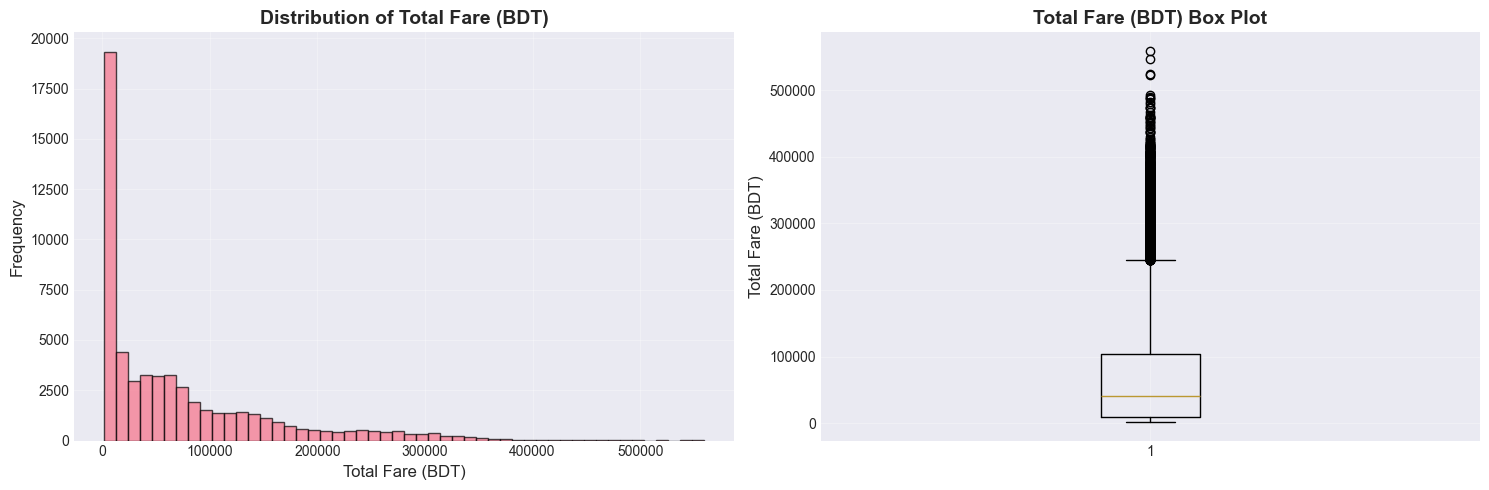


Total Fare (BDT) Statistics:
Mean:      71,030.32 BDT
Median:    41,307.54 BDT
Min:        1,800.98 BDT
Max:      558,987.33 BDT
Std:       81,769.20 BDT


In [10]:
# Plot total fare distribution
visualizations.plot_target_distribution(df)

## 6. Categorical Variables Analysis

In [11]:
# Analyze airlines
analysis.analyze_categorical_variable(df, 'Airline', top_n=10)


Airline Distribution:
Airline
US-Bangla Airlines           4496
Lufthansa                    2368
Vistara                      2368
FlyDubai                     2346
Biman Bangladesh Airlines    2344
Emirates                     2327
Saudia                       2321
Thai Airways                 2316
AirAsia                      2312
Air Astra                    2304
Name: count, dtype: int64
... and 14 more


In [12]:
# Average fare by airline
airline_stats = visualizations.plot_average_fare_by_category(
    df, 'Airline', title='Average Fare by Airline'
)
airline_stats

,mean,median,count
Airline,,,
Turkish Airlines,75547.27,43172.68,2220
AirAsia,74534.39,42763.82,2312
Cathay Pacific,73325.09,46282.46,2282
Thai Airways,72845.79,42898.83,2316
Malaysian Airlines,72775.18,41938.11,2292
IndiGo,72504.43,42018.49,2223
Air India,72474.18,42429.62,2280
US-Bangla Airlines,72088.29,41255.33,4496
Kuwait Airways,71988.28,39584.26,2262


In [13]:
# Analyze class distribution
analysis.analyze_categorical_variable(df, 'Class')
class_stats = analysis.analyze_fare_by_category(df, 'Class', top_n=3)


Class Distribution:
Class
Economy        19112
First Class    18979
Business       18909
Name: count, dtype: int64

Average Total Fare (BDT) by Class (Top 3):
                 mean   median  count
Class                                
First Class 120764.21 94191.04  18979
Business     62581.01 51061.84  18909
Economy      30002.07 24071.44  19112


In [14]:
# Create and analyze routes
df = analysis.create_route_feature(df)
route_analysis = analysis.analyze_routes(df, top_n=10)


Top 10 Most Popular Routes:
Route
RJH → SIN    417
DAC → DXB    413
BZL → YYZ    410
CGP → BKK    408
CXB → DEL    408
BZL → JED    407
SPD → DEL    404
RJH → JFK    404
CGP → CXB    404
CGP → RJH    403
Name: count, dtype: int64

Top 10 Most Expensive Routes (min 10 flights):
               mean  count
Route                     
SPD → BKK 117951.57    388
CXB → YYZ 117848.71    383
CXB → LHR 116667.65    372
CXB → JFK 116476.31    389
BZL → JFK 115968.44    371
ZYL → KUL 115656.92    395
RJH → DXB 115485.47    373
SPD → DXB 115426.28    385
BZL → LHR 114788.65    376
RJH → JFK 114415.73    404


In [15]:
# Analyze stopovers
analysis.analyze_categorical_variable(df, 'Stopovers')
stopover_stats = analysis.analyze_fare_by_category(df, 'Stopovers', top_n=3)


Stopovers Distribution:
Stopovers
Direct     36642
1 Stop     17400
2 Stops     2958
Name: count, dtype: int64

Average Total Fare (BDT) by Stopovers (Top 3):
               mean   median  count
Stopovers                          
2 Stops   110602.43 82075.98   2958
1 Stop    107607.31 78613.57  17400
Direct     50466.65 12229.39  36642


In [16]:
# Analyze seasonality
analysis.analyze_categorical_variable(df, 'Seasonality')
seasonal_stats = analysis.analyze_fare_by_category(df, 'Seasonality', top_n=4)


Seasonality Distribution:
Seasonality
Regular            44525
Winter Holidays    10930
Hajj                 942
Eid                  603
Name: count, dtype: int64

Average Total Fare (BDT) by Seasonality (Top 4):
                    mean   median  count
Seasonality                             
Hajj            97144.47 54250.27    942
Eid             91560.02 56621.23    603
Winter Holidays 79676.74 47272.62  10930
Regular         68077.27 39898.22  44525


## 7. Temporal Analysis

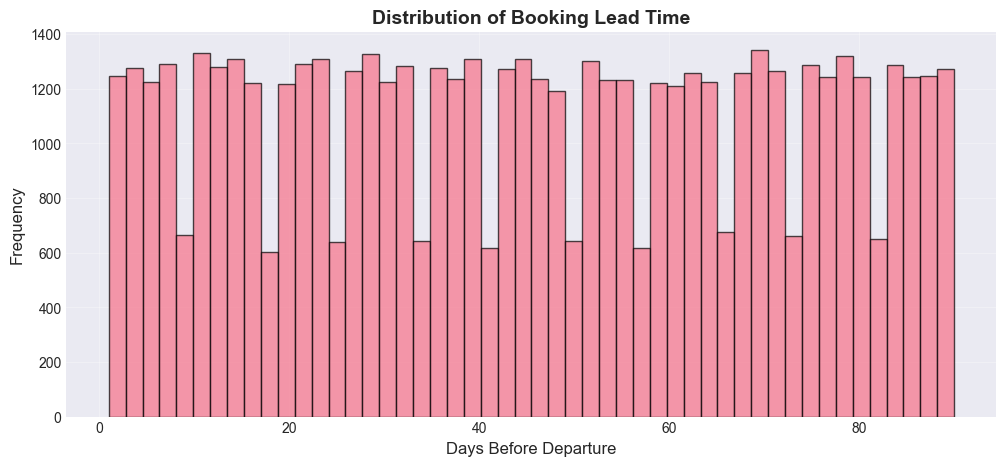


Booking Lead Time Statistics:
Mean:   45.46 days
Median: 45.00 days
Min:    1 days
Max:    90 days


In [17]:
# Booking lead time distribution
visualizations.plot_booking_lead_time(df)

In [18]:
# Booking lead time vs fare
visualizations.plot_scatter_with_trend(
    df, 
    'Days Before Departure', 
    'Total Fare (BDT)',
    sample_size=5000,
    title='Booking Lead Time vs Total Fare'
)

## 8. Fare Component Analysis

In [19]:
# Calculate tax percentage
df = analysis.calculate_tax_percentage(df)


Fare Components:
Base Fare - Mean:       58,899.56 BDT
Tax & Surcharge - Mean: 11,448.24 BDT
Total Fare - Mean:      71,030.32 BDT

Average Tax Percentage: 17.89%


## 9. Correlation Analysis

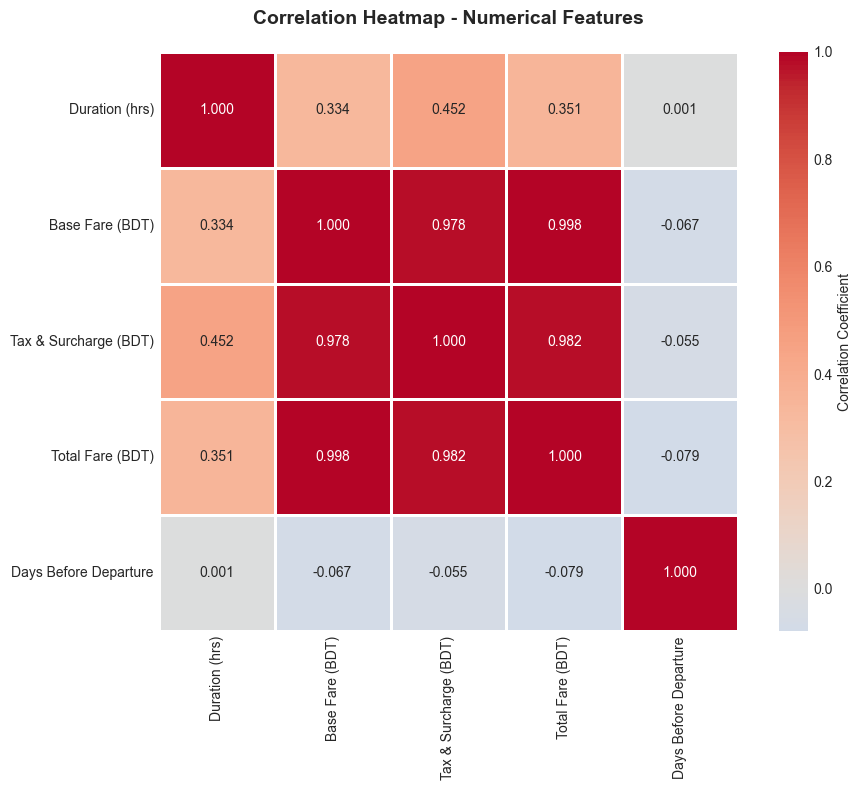


Correlations with Total Fare:
Total Fare (BDT)         1.00
Base Fare (BDT)          1.00
Tax & Surcharge (BDT)    0.98
Duration (hrs)           0.35
Days Before Departure   -0.08
Name: Total Fare (BDT), dtype: float64


In [20]:
# Correlation heatmap
numerical_cols = [
    'Duration (hrs)', 
    'Base Fare (BDT)', 
    'Tax & Surcharge (BDT)', 
    'Total Fare (BDT)', 
    'Days Before Departure'
]

corr_matrix = visualizations.plot_correlation_heatmap(df, numerical_cols)

print("\nCorrelations with Total Fare:")
print(corr_matrix['Total Fare (BDT)'].sort_values(ascending=False))

## 10. Business Insights

In [21]:
# Generate key business insights
insights = analysis.generate_business_insights(df, top_n=3)

KEY BUSINESS INSIGHTS

Average Fare Per Airline (Top 3):
   1. Turkish Airlines: 75,547.27 BDT (n=2,220.0)
   2. AirAsia: 74,534.39 BDT (n=2,312.0)
   3. Cathay Pacific: 73,325.09 BDT (n=2,282.0)

MOST POPULAR ROUTES (Top 3):
   1. RJH → SIN: 417 flights, Avg Fare: 113,962.52 BDT
   2. DAC → DXB: 413 flights, Avg Fare: 104,942.47 BDT
   3. BZL → YYZ: 410 flights, Avg Fare: 107,844.15 BDT

SEASONAL FARE VARIATION:
   1. Hajj: 97,144.47 BDT
   2. Eid: 91,560.02 BDT
   3. Winter Holidays: 79,676.74 BDT
   4. Regular: 68,077.27 BDT

CLASS IMPACT ON FARES:
   1. First Class: 120,764.21 BDT (18,979.0 flights)
   2. Business: 62,581.01 BDT (18,909.0 flights)
   3. Economy: 30,002.07 BDT (19,112.0 flights)



## 11. Final Data Quality Summary

In [22]:
# Generate comprehensive quality summary
quality_summary = data_quality.generate_quality_summary(df)

print(f"\nFlight Details:")
print(f"   Unique Airlines: {df['Airline'].nunique()}")
print(f"   Unique Routes: {df['Route'].nunique()}")
print(f"   Unique Sources: {df['Source'].nunique()}")
print(f"   Unique Destinations: {df['Destination'].nunique()}")

print("\n" + "=" * 60)
print("Initial exploration complete! Ready for preprocessing.")
print("=" * 60)

DATA QUALITY SUMMARY

Dataset Size:
   Total Records: 57,000
   Total Features: 19

Data Quality:
   Missing Values: 0
   Duplicate Rows: 0
   Complete Records: 57,000

Target Variable (Total Fare):
   Range: 1,800.98 - 558,987.33 BDT
   Mean: 71,030.32 BDT
   Median: 41,307.54 BDT
   Std Dev: 81,769.20 BDT


Flight Details:
   Unique Airlines: 24
   Unique Routes: 152
   Unique Sources: 8
   Unique Destinations: 20

Initial exploration complete! Ready for preprocessing.


## Next Steps

1. **Data Preprocessing**: Handle missing values, outliers, and data type conversions
2. **Feature Engineering**: Create temporal features, encode categoricals, engineer new features
3. **Model Development**: Train baseline and advanced models
4. **Evaluation**: Compare model performance and select best approach